# Submission by Amit Gupta

# Table of Contents

1. [Step 1: Understanding the Problem and the Data](#1.0)
2. [Step 2: Import and Inspect the Data](#2.0)
    - [Statistical summary for numerical columns and Unique values for categorical data](#2.1)
    - [Step 3: Handling Missing Values](#2.2)
3. [Step 4: Explore Data Characteristics](#3.0)
    - [Univariate and Bivariate Analysis](#3.1)
      - [3.1.1 Univariate analysis of dateTime](#3.1.1)
      - [3.1.2 Bivariate analysis of dateTime and count](#3.1.2)
      - [3.1.3 Bivariate analysis of season and count](#3.1.3)
      - [3.1.4 Bivariate analysis of holiday and count](#3.1.4)
      - [3.1.5 Bivariate analysis of workingday and count](#3.1.5)
      - [3.1.6 Bivariate analysis of weather and count](#3.1.6)
      - [3.1.7 Bivariate analysis of temp and count](#3.1.7)
      - [3.1.8 Bivariate analysis of atemp and count](#3.1.8)
      - [3.1.9 Bivariate analysis of humidity and count](#3.1.9)
      - [3.1.10 Bivariate analysis of windspeed and count](#3.1.10) 
      - [3.1.11 Trivariate analysis of casual users to count](#3.1.11)      
      - [3.1.12 Trivariate analysis of registered users, count and day of the week](#3.1.12)    
    - [3.2 Use Statistical Tests](#3.2)
      - [3.2.1 Use ChiSquare Test for independence to find categorical columns that are dependent on each other](#3.2.1)
      - [3.2.2 Use Correlation and T Test for Two samples to find numerical columns that are dependent](#3.2.2)
      - [3.2.3 Use ANOVA/Kruksal Test for checking if categorical column(month,day_of_week,hour,season,weather,workingday) and numerical column(temp) are dependent](#3.2.3)
      - [3.2.4 Use ANOVA/Kruksal Test for checking if categorical column(month,day_of_week,hour,season,weather,workingday) and numerical column(count) are dependent](#3.2.4)

4. [4. Answering Questions asked in Case Study](#4.0)
   - [4.1 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented](#4.1)
   - [4.2 ANOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season ](#4.2)
   - [4.3 Chi-square test to check if Weather is dependent on the season](#4.3)
5. [Business Insights](#5.0)
6. [Inferences](#6.0)

<table>
<th>

<span style="font-size:30px; font-family:Arial;color:orange">LEGEND</span>
</th>

<tr><td><span style="font-size:50px; font-family:Arial;color:red">Analysis Steps in Red color</span></td></tr>
<tr><td><span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span></td></tr>
<tr><td><span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">These are insights got from analysing the data, in Blue color</span></td></tr>
<tr><td>''' ''' code sections are notes to self, some quick code snippets, or some notes while doing analysis</td></tr>
</table>



In [2]:
''' Notes to Self
my markdown templates
<span style="font-size:50px; font-family:Arial;color:red">Use this for heading/span><li>
<span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span><li>
<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">Use this for insight </span><li>
'''

' Notes to Self\nmy markdown templates\n<span style="font-size:50px; font-family:Arial;color:red">Use this for heading/span><li>\n<span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span><li>\n<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">Use this for insight </span><li>\n'

# 1.0
<span style="font-size:50px; font-family:Arial;color:red">Step 1: Understanding the Problem and the Data</span>


About Yulu
Yulu is India’s leading micro-mobility service provider,
* offers electric cycles for the daily commute. 
* provides a mobile app to enable shared, solo commuting.
* The bikes are to be picked from Yulu zones
* Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc)


Business Problem

Yulu has recently suffered considerable dips in its revenues. 
They want to 
* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands



Dataset
The company collected the transactional data of customers

The dataset has the following features:
Dataset link: Walmart_data.csv

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered



# 2.0
<span style="font-size:50px; font-family:Arial;color:red">Step 2: Import and Inspect the Data</span>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pingouin as pg

In [4]:
''' 
Notes to Self
During this step, looking into the statistics is critical to gain initial know-how of its structure, variable kinds, and capability issues.

'''

' \nNotes to Self\nDuring this step, looking into the statistics is critical to gain initial know-how of its structure, variable kinds, and capability issues.\n\n'

In [5]:
df =pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
#convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# 2.1

<span style="font-size:30px; font-family:Arial;color:orange">Statistical summary for numerical columns and Unique values for categorical data

In [8]:
#Instead of manually creating tables and collecting values
#lets automate it.
#We will generate a table of all columns in Markdown format 
#We will paste this table into a markdown cell and then we may add additional analysis
#!pip install tabulate
from tabulate import tabulate
def generate_markdown_table_with_details(df):
    column_details = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        if df[col].dtype == 'object':
            cat_or_num = 'Categorical'
            details = df[col].unique().tolist()
            if(len(details)>10):
                details= f'{df[col].nunique()} unique values'
        else:
            cat_or_num = 'Numerical'
            details = f"Min: {df[col].min()}, Max: {df[col].max()}"
        column_details.append([col, dtype, cat_or_num, details, ''])

    # Create a DataFrame for the table
    table_df = pd.DataFrame(column_details, columns=['Column Name', 'Data Type', 'Categorical or Numerical', 'Details', 'Business Description(fill manually)'])

    # Convert DataFrame to Markdown
    markdown_table = tabulate(table_df, headers='keys', tablefmt='pipe', showindex=False)
    return markdown_table

markdown_table = generate_markdown_table_with_details(df)
print(f'There are a total of {df.shape[0]} rows and {df.shape[1]} columns')
print(markdown_table)


There are a total of 10886 rows and 12 columns
| Column Name   | Data Type      | Categorical or Numerical   | Details                                            | Business Description(fill manually)   |
|:--------------|:---------------|:---------------------------|:---------------------------------------------------|:--------------------------------------|
| datetime      | datetime64[ns] | Numerical                  | Min: 2011-01-01 00:00:00, Max: 2012-12-19 23:00:00 |                                       |
| season        | int64          | Numerical                  | Min: 1, Max: 4                                     |                                       |
| holiday       | int64          | Numerical                  | Min: 0, Max: 1                                     |                                       |
| workingday    | int64          | Numerical                  | Min: 0, Max: 1                                     |                                       |
| weather  

In [9]:
''' 
Notes to Self
Adding insights about columns and data size.  
We identify which columns are numerical, which are categorical
Within categorical, we identify if it is nominal or ordinal data.  This helps us to decide best graph to use 
Also ordinal data can be converted into numeric using codes thereby making it available for some kind of graphs.
'''

' \nNotes to Self\nAdding insights about columns and data size.  \nWe identify which columns are numerical, which are categorical\nWithin categorical, we identify if it is nominal or ordinal data.  This helps us to decide best graph to use \nAlso ordinal data can be converted into numeric using codes thereby making it available for some kind of graphs.\n'

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white; ">There are a total of 10886 rows and 12 columns</span>


| Column Name   | Data Type   | Categorical or Numerical   | Details                | Business Description(fill manually)   |
|:--------------|:------------|:---------------------------|:-----------------------|:--------------------------------------|
| datetime      | datetime64[ns] | Numerical                  | Min: 2011-01-01 00:00:00, Max: 2012-12-19 23:00:00 |                                       |
| season        | int64       | Categorical(nominal)                  | Min: 1, Max: 4         | 1: spring, 2: summer, 3: fall, 4: winter                                      |
| holiday       | int64       | Categorical(nominal)                  | Min: 0, Max: 1         | 0: No Holiday 1: Holiday                                      |
| workingday    | int64       | Categorical(nominal)                  | Min: 0, Max: 1         | 0: Holiday 1: Not Holiday                                     |
| weather       | int64       | Categorical(ordinal)                  | Min: 1, Max: 4         | 1: Clear, Few clouds, partly cloudy, partly cloudy,2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered ,clouds, Light Rain + Scattered clouds,4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp          | float64     | Numerical                  | Min: 0.82, Max: 41.0   |                                       |
| atemp         | float64     | Numerical                  | Min: 0.76, Max: 45.455 |                                       |
| humidity      | int64       | Numerical                  | Min: 0, Max: 100       |                                       |
| windspeed     | float64     | Numerical                  | Min: 0.0, Max: 56.9969 |                                       |
| casual        | int64       | Numerical                  | Min: 0, Max: 367       |                                       |
| registered    | int64       | Numerical                  | Min: 0, Max: 886       |                                       |
| count         | int64       | Numerical                  | Min: 1, Max: 977       |                                       |

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">casual and registered are the target columns and we want to identify which other columns affect them</span>

In [10]:
''' 
Notes to Self
Let's get a quick summary of the dataset using the pandas describe() method. 
The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. 
Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.
'''
df.describe(include ='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


# 2.2
<span style="font-size:50px; font-family:Arial;color:red">Step 3: Handling Missing Values</span>

In [11]:
''' 
Notes to Self
Missing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

isnull()
notnull()
dropna()
fillna()
replace()
interpolate()
'''

' \nNotes to Self\nMissing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :\n\nisnull()\nnotnull()\ndropna()\nfillna()\nreplace()\ninterpolate()\n'

In [12]:
#Now let's check if there are any missing values in our dataset or not.
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">Awesome! the data does not have any missing values</span>

# 3.0
<span style="font-size:50px; font-family:Arial;color:red">Step 4: Explore Data Characteristics</span>

In [13]:
''' 
Notes to self
By exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders.
Let's start by exploring the data according to the dataset.

for categorical columns, use
--------------------------------
sns.countplot(data=df, x='Product')
df.Product.value_counts().plot.bar()
df['Product'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))



for numerical columns use
---------------------------
df.hist() # Quickly create histograms for all numeric columns
sns.histplot(data=df["Age"], kde=True)
df.Age.plot.hist() #hist for Specific column
df.Age.plot.kde()
df.Age.plot.box()

df.plot.box()#Print boxplots of all numerical columns in one go

sns.violinplot(data=df , x='Age')




'''

' \nNotes to self\nBy exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders.\nLet\'s start by exploring the data according to the dataset.\n\nfor categorical columns, use\n--------------------------------\nsns.countplot(data=df, x=\'Product\')\ndf.Product.value_counts().plot.bar()\ndf[\'Product\'].value_counts().plot.pie(autopct=\'%1.1f%%\', startangle=90, colors=sns.color_palette(\'pastel\'))\n\n\n\nfor numerical columns use\n---------------------------\ndf.hist() # Quickly create histograms for all numeric columns\nsns.histplot(data=df["Age"], kde=True)\ndf.Age.plot.hist() #hist for Specific column\ndf.Age.plot.kde()\ndf.Age.plot.box()\n\ndf.plot.box()#Print boxplots of all num

Visual inspection of the data reveals that its a hour by hour data, and in each hour we are provided how many bookings happened.

# 3.1
<span style="font-size:40px; font-family:Arial;color:orange">
Univariate and Bivariate Analysis (Analysis of one attribute at a time.)

# 3.1.1
<span style="font-size:30px; font-family:Arial;color:orange">Univariate analysis of dateTime</span>


In [14]:
#split date time to year, month, day, hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['min'] = df['datetime'].dt.minute

In [15]:
#add a column for day of the week
df['day_of_week'] = df['datetime'].dt.dayofweek



In [16]:
#find min and max year in dataset
print(df['datetime'].min())
print(df['datetime'].max())




2011-01-01 00:00:00
2012-12-19 23:00:00


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">We have data of 2 years</span>

# 3.1.2
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of dateTime and count</span>

<Axes: xlabel='year'>

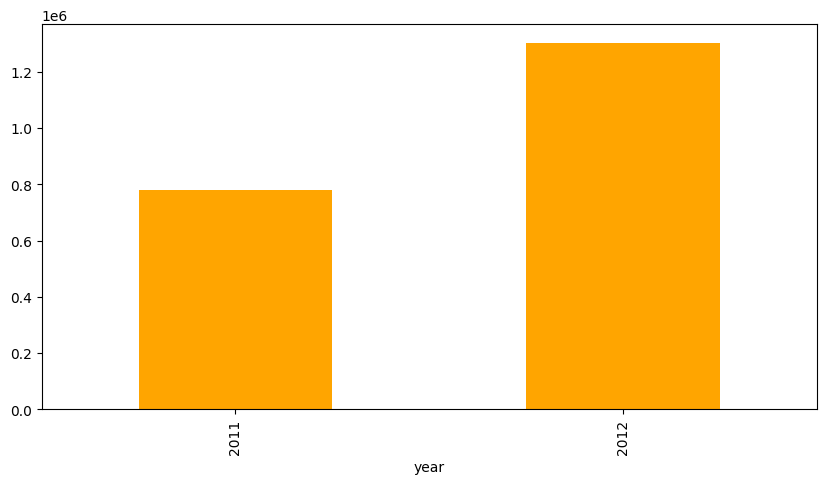

In [17]:
ridesPerYear = df.groupby('year')['count'].sum()
ridesPerYear.plot(kind='bar', figsize=(10,5), color='orange')

In [18]:
#find percentage increase in rides from 2011 to 2012 
increase = ((ridesPerYear[2012] - ridesPerYear[2011])/ridesPerYear[2011]) * 100
increase


66.6920722935015

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">It does not seem that the number of rides have reduced in the past two years.  Data is suggesting number of rides in 2012 were 66% more than in 2011</span>


<Axes: xlabel='month'>

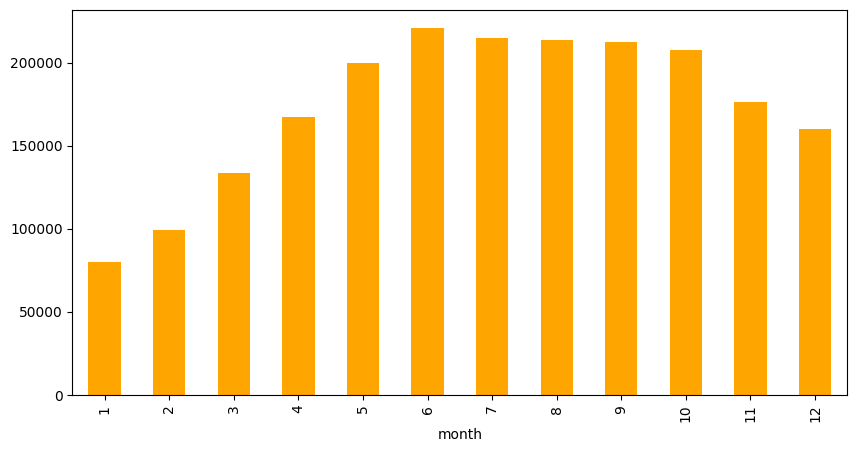

In [19]:
ridesPerMonth = df.groupby('month')['count'].sum()
ridesPerMonth.plot(kind='bar', figsize=(10,5), color='orange')

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">Jan-Feb-Mar are low months.  Need to check if it is related to temperature</span>

In [20]:
ridesPerMonth

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

<Axes: xlabel='day_of_week'>

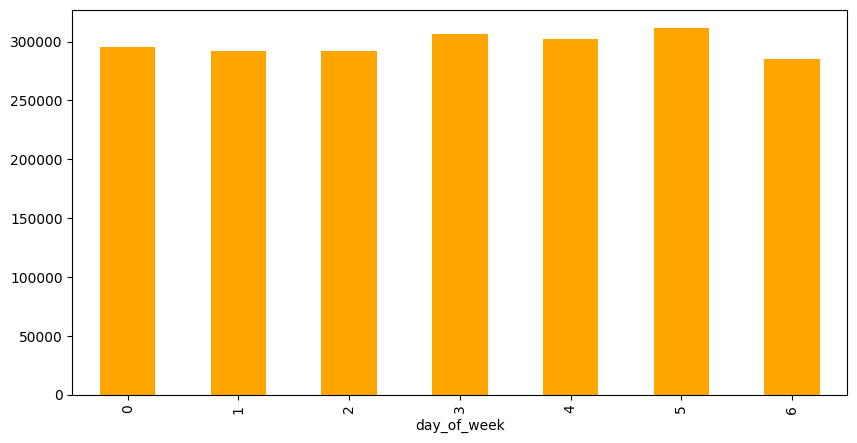

In [21]:
ridesPerDayOfWeek = df.groupby('day_of_week')['count'].sum()
ridesPerDayOfWeek.plot(kind='bar', figsize=(10,5), color='orange')

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">Not much difference in terms of days of the week.  Every day seems to be almost the same number of rides taken</span>

<Axes: xlabel='hour'>

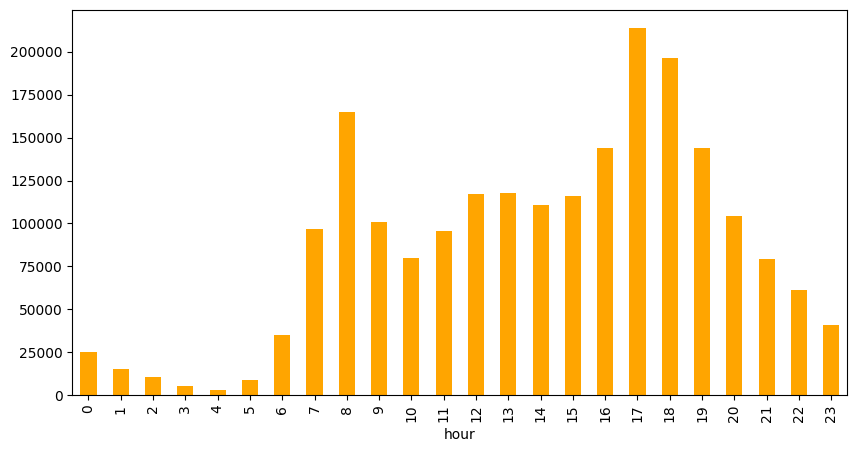

In [22]:
ridesPerHourOfDay = df.groupby('hour')['count'].sum()
ridesPerHourOfDay.plot(kind='bar', figsize=(10,5), color='orange')



<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li> 7AM to 8PM is the busiest time of the day, which is on expected lines.  
<li> Also while people may reach their place of work at different times, they all mostly leave at 4pm to 7pm.
<li> 5pm is the busiest hour of the day.
<li> 4am is the least busiest hour of the day.
</span>

# 3.1.3 
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of season and count

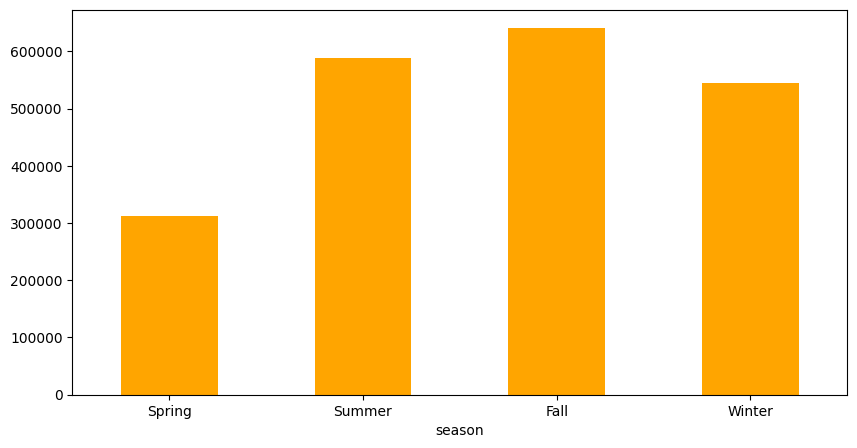

In [23]:
ridesPerSeason = df.groupby('season')['count'].sum()
ridesPerSeason.plot(kind='bar', figsize=(10,5), color='orange')

#in the x axis replace the numbers with the actual season names
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()


Fall has highest ride count and spring has lowest ride count

# 3.1.4
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of holiday and count

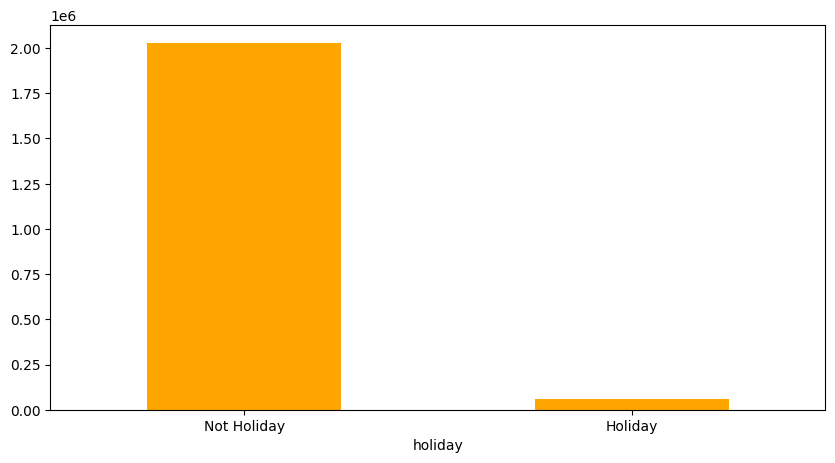

In [24]:
ridesOnHolidays = df.groupby('holiday')['count'].sum()
ridesOnHolidays.plot(kind='bar', figsize=(10,5), color='orange')

#in the x axis replace the numbers with the actual season names
plt.xticks(ticks=[0,1], labels=['Not Holiday', 'Holiday'], rotation=0)
plt.show()


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
People dont use the rides on public declared holidays

# 3.1.5 
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of workingday and count

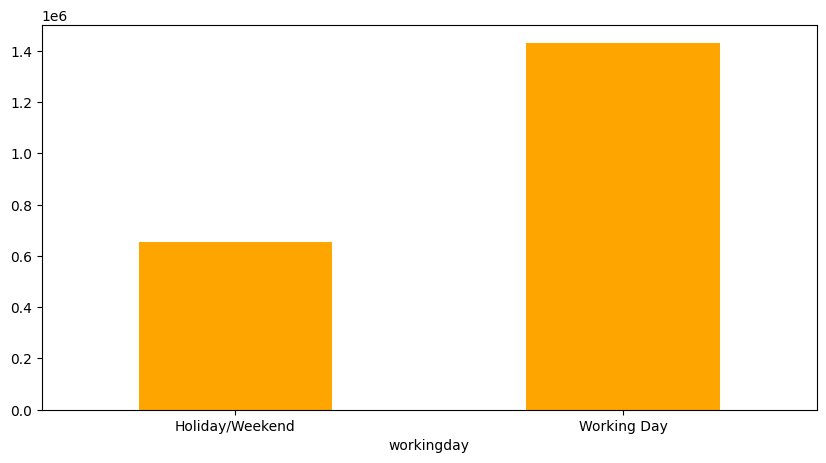

In [25]:
ridesOnWorkingDays = df.groupby('workingday')['count'].sum()
ridesOnWorkingDays.plot(kind='bar', figsize=(10,5), color='orange')

#in the x axis replace the numbers with the actual season names
plt.xticks(ticks=[1,0], labels=['Working Day', 'Holiday/Weekend'], rotation=0)
plt.show()


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">We already established that rides are independent on days of the week, so the above graph seems anamolous.  But consider the fact that number of working days are more and number of days in weekend are less, and it will more or less converge with the understanding that day of the week does not have an impact.  this can be analysed statistically later.

# 3.1.6
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of weather and count</span>


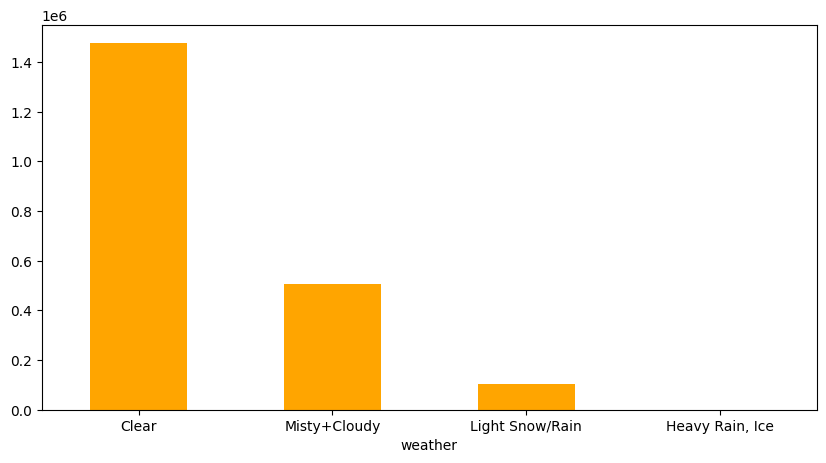

In [26]:
ridesOnWeatherConditions = df.groupby('weather')['count'].sum()
ridesOnWeatherConditions.plot(kind='bar', figsize=(10,5), color='orange')

#in the x axis replace the numbers with the actual season names
plt.xticks(ticks=[0,1,2,3], labels=['Clear', 'Misty+Cloudy','Light Snow/Rain','Heavy Rain, Ice'], rotation=0)
plt.show()


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Most rides are on clear days
<li>If there is Cloudy or light rain, rides are much less
<li>There are NO rides during extreme conditions of heavy rain or ice

# 3.1.7
<span style="font-size:30px; font-family:Arial;color:orange">Univariate analysis of Temp and Bivariate analysis of temp and count</span>


Shapiro p_value:  7.010353759515344e-26
Reject Null Hypothesis. Alternate Hypothesis 'temp is not normally distributed' is True


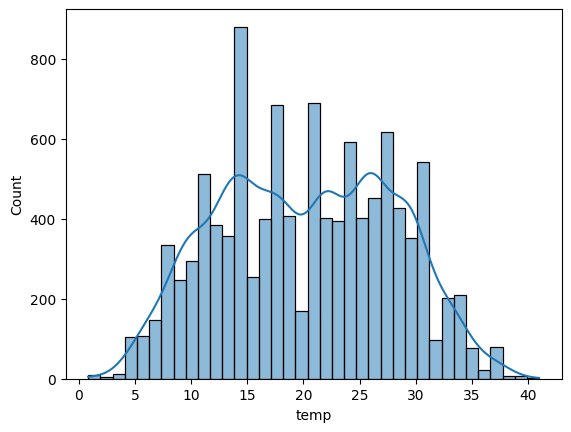

In [27]:
#Reusable code, only change the numerical column

numerical_column='temp'
#plot histogram for numerical_column
sns.histplot(data=df[numerical_column], kde=True)

#Null Hypothesis= 
Ho=f"{numerical_column} is normally distributed"
#Alternate Hypothesis
Ha = f"{numerical_column} is not normally distributed"

test_stat, p_value = stats.shapiro(df[numerical_column].sample(5000))
print("Shapiro p_value: ", p_value)

if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")


Text(0.5, 1.0, 'Temperature vs Count')

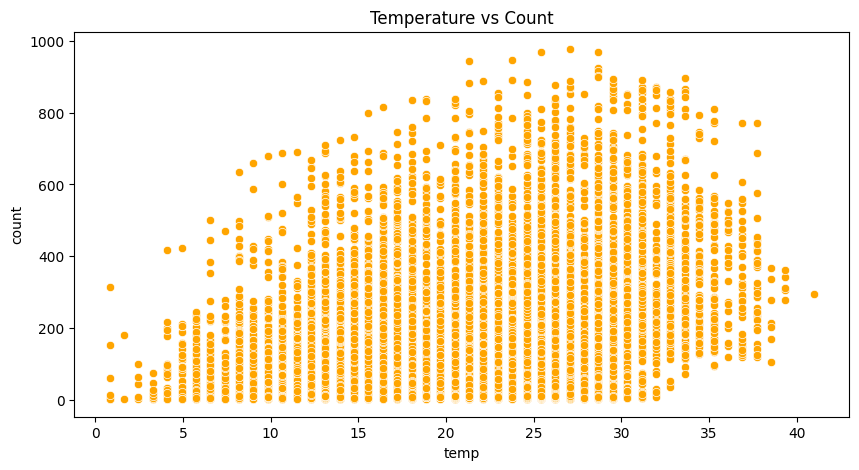

In [28]:
#temp vs count
plt.figure(figsize=(10,5))  
sns.scatterplot(x='temp', y='count', data=df, color='orange')
plt.title('Temperature vs Count')


C:\Users\Admin\AppData\Local\Temp\ipykernel_4636\1541152775.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ridesPerTempBin = df.groupby('temp_bin')['count'].sum()


<Axes: xlabel='temp_bin'>

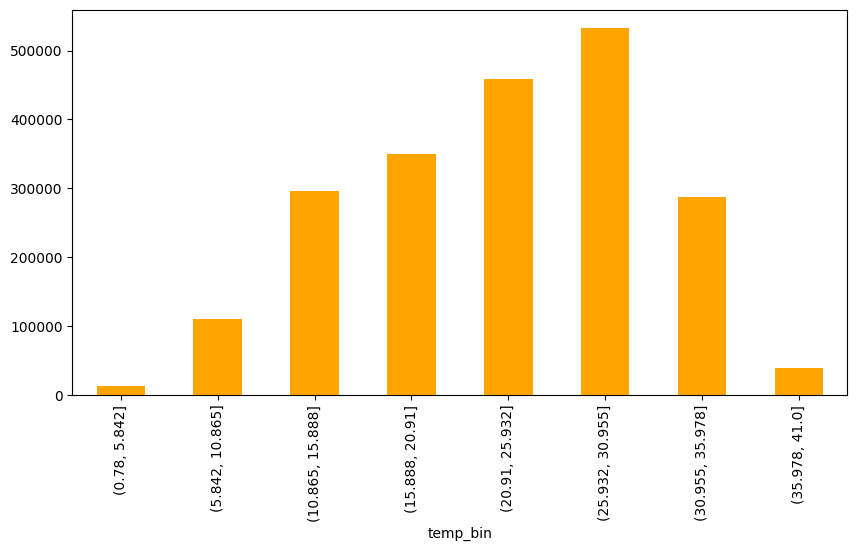

In [29]:
#create bins for temperature and then plot the sum of count for each bin
df['temp_bin'] = pd.cut(df['temp'], bins=8)
ridesPerTempBin = df.groupby('temp_bin')['count'].sum()
ridesPerTempBin.plot(kind='bar', figsize=(10,5), color='orange')


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Most rides are between 15-35 temperature range
<li>Very less rides below 5c and above 35c



# 3.1.8
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of atemp and count</span>

C:\Users\Admin\AppData\Local\Temp\ipykernel_4636\970020554.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ridesPerATempBin = df.groupby('atemp_bin')['count'].sum()


<Axes: xlabel='atemp_bin'>

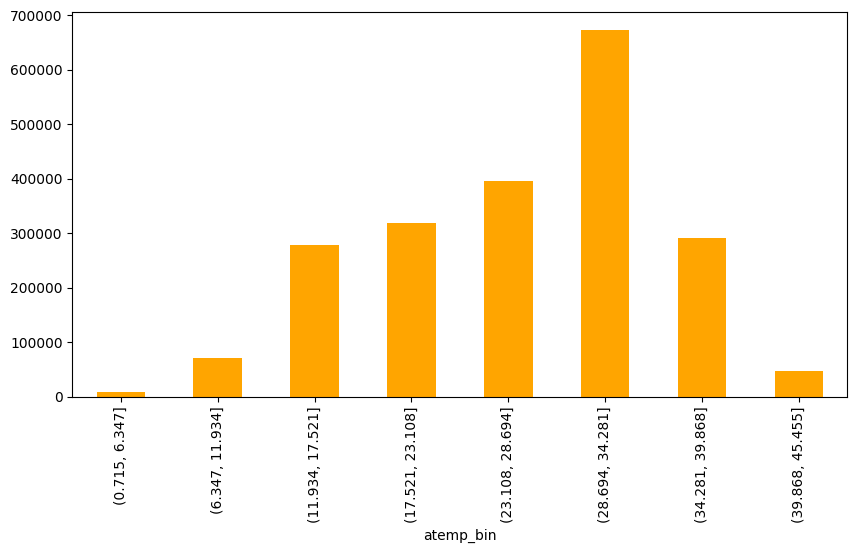

In [30]:
#create bins for temperature and then plot the sum of count for each bin
df['atemp_bin'] = pd.cut(df['atemp'], bins=8)
ridesPerATempBin = df.groupby('atemp_bin')['count'].sum()
ridesPerATempBin.plot(kind='bar', figsize=(10,5), color='orange')


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Atemp comfortable range seems to be 12 to 39 c

# 3.1.9
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of humidity and count</span>

Shapiro p_value:  8.083312447384003e-26
Reject Null Hypothesis. Alternate Hypothesis 'humidity is not normally distributed' is True


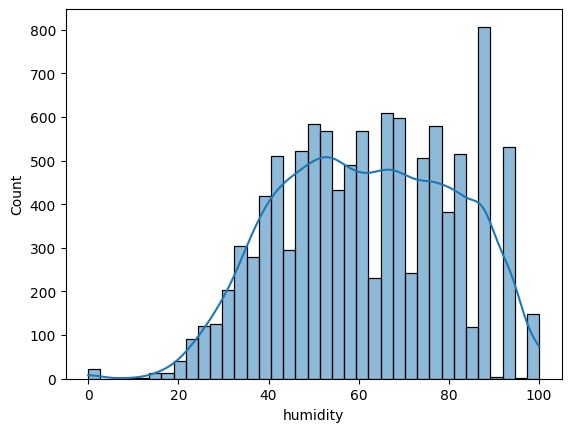

In [31]:
#Reusable code, only change the numerical column

numerical_column='humidity'
#plot histogram for numerical_column
sns.histplot(data=df[numerical_column], kde=True)

#Null Hypothesis= 
Ho=f"{numerical_column} is normally distributed"
#Alternate Hypothesis
Ha = f"{numerical_column} is not normally distributed"

test_stat, p_value = stats.shapiro(df[numerical_column].sample(5000))
print("Shapiro p_value: ", p_value)

if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")


C:\Users\Admin\AppData\Local\Temp\ipykernel_4636\2904597832.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ridesVsHumidity = df.groupby('humidity_bin')['count'].sum()


<Axes: xlabel='humidity_bin'>

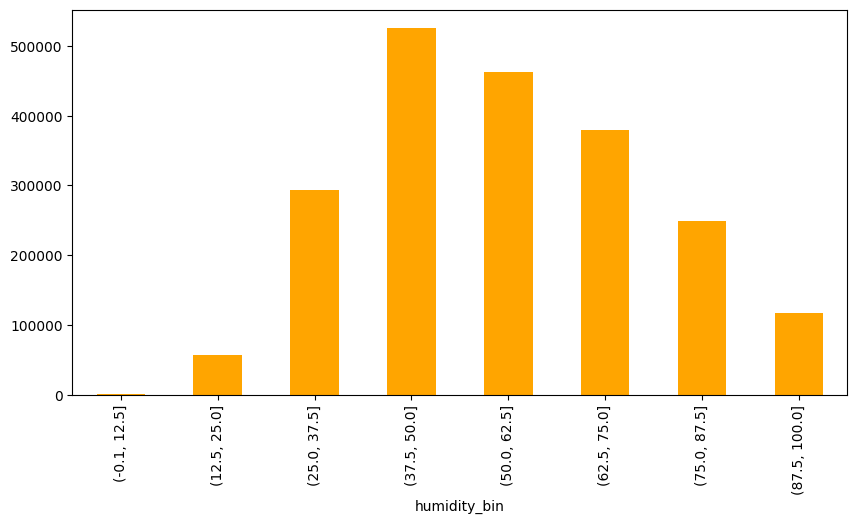

In [32]:
#create bins for humidity and then plot the sum of count for each bin
df['humidity_bin'] = pd.cut(df['humidity'], bins=8)
ridesVsHumidity = df.groupby('humidity_bin')['count'].sum()
ridesVsHumidity.plot(kind='bar', figsize=(10,5), color='orange')


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>People dont take rides in extremely less (hot dry weather) or extremely max humidity (rain)
<li>Most comfortable range is 37-50% humidity

# 3.1.10
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of windspeed and count</span>

C:\Users\Admin\AppData\Local\Temp\ipykernel_4636\1039969068.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ridesVsHumidity = df.groupby('windspeed_bin')['count'].sum()


<Axes: xlabel='windspeed_bin'>

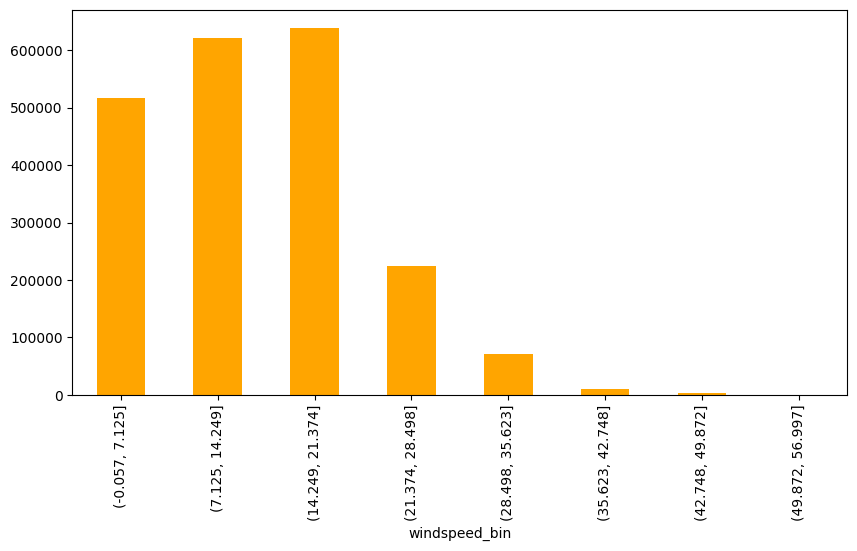

In [33]:
#create bins for windspeed and then plot the sum of count for each bin
df['windspeed_bin'] = pd.cut(df['windspeed'], bins=8)
ridesVsHumidity = df.groupby('windspeed_bin')['count'].sum()
ridesVsHumidity.plot(kind='bar', figsize=(10,5), color='orange')

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>People like to take cycle rides when windspeed is less as it is easier to drive a cycle
<li>As speed increases, people tend to enjoy riding and take more rides as it might be comfortable and pleasant
<li>However as it becomes windy, the counts drop drastically
<li>Virtually no rides after speed of 35 units

# 3.1.11
<span style="font-size:30px; font-family:Arial;color:orange">Trivariate analysis of casual and count</span>

<Axes: xlabel='day_of_week'>

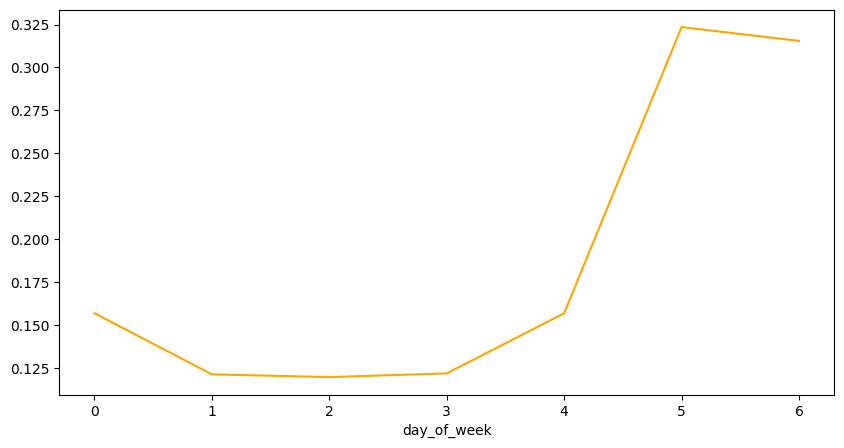

In [34]:
#ratio of casual to total users per day
casualCountPerDay = df.groupby('day_of_week')[['casual', 'count']].sum()
casualCountPerDay['ratio'] = casualCountPerDay['casual'] / casualCountPerDay['count']
casualCountPerDay['ratio'].plot(kind='line', figsize=(10,5), color='orange')







In [35]:
casualCountPerDay


,casual,count,ratio
day_of_week,,,
0,46288,295296,0.156751
1,35365,291985,0.121119
2,34931,292226,0.119534
3,37283,306401,0.121680
4,47402,302504,0.156699
5,100782,311518,0.323519
6,90084,285546,0.315480


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Weekends see a 3-fold increase in number of casual riders.  
<li>Most riders on weekdays are registered users

# 3.1.12 
<span style="font-size:30px; font-family:Arial;color:orange">Trivariate analysis of registered users, count and day of the week</span>

<Axes: xlabel='day_of_week'>

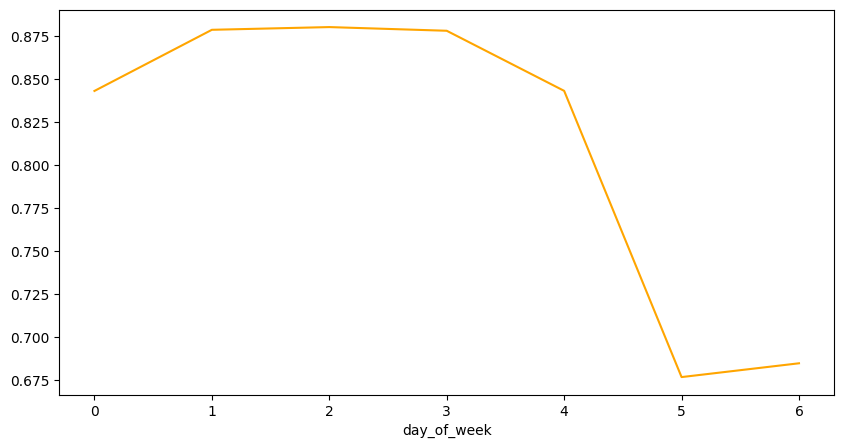

In [36]:
#find ratio of registered users to total users per day
registeredCountPerDay = df.groupby('day_of_week')[['registered', 'count']].sum()
registeredCountPerDay['ratio'] = registeredCountPerDay['registered'] / registeredCountPerDay['count']
registeredCountPerDay['ratio'].plot(kind='line', figsize=(10,5), color='orange')

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>On weekdays, 84%-87.5% customers are registered users

# 3.2 
<span style="font-size:30px; font-family:Arial;color:orange">Use Statistical Tests</span>

# 3.2.1 
<span style="font-size:30px; font-family:Arial;color:orange">Use ChiSquare Test for independence to find categorical columns that are dependent on each other</span>



In [63]:
contingency_tab = pd.crosstab(df['season'], df['weather'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_tab)
print("chi2: ", chi2)
print("p: ", p)
print("dof: ", dof)


chi2:  49.158655596893624
p:  1.549925073686492e-07
dof:  9


In [61]:
#Lets do Cramer V test
n = np.sum(contingency_tab)  # Total number of observations
min_dim = min(contingency_tab.shape) - 1  # Degrees of freedom for smaller dimension
cramers_v = np.sqrt(chi2 / (n * min_dim))


print(f'crosstab:{contingency_tab}')
print("Cramér's V:", cramers_v)
print(f'n {n}')
print(f'min_dim {min_dim}')

crosstab:weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0
Cramér's V: weather
1    0.047733
2    0.076040
3    0.138116
4    4.047989
dtype: float64
n weather
1    7192
2    2834
3     859
4       1
dtype: int64
min_dim 3


C:\tools\Manim\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Null Hypothesis= Season and Weather are independent, Alternate Hypothesis= Season and Weather are dependent
<li>Using ChiSquare test, we establish that Season and weather are highly dependent


# 3.2.2
<span style="font-size:30px; font-family:Arial;color:orange">Use Correlation and T Test for Two samples to find numerical columns that are dependent</span>

<Axes: >

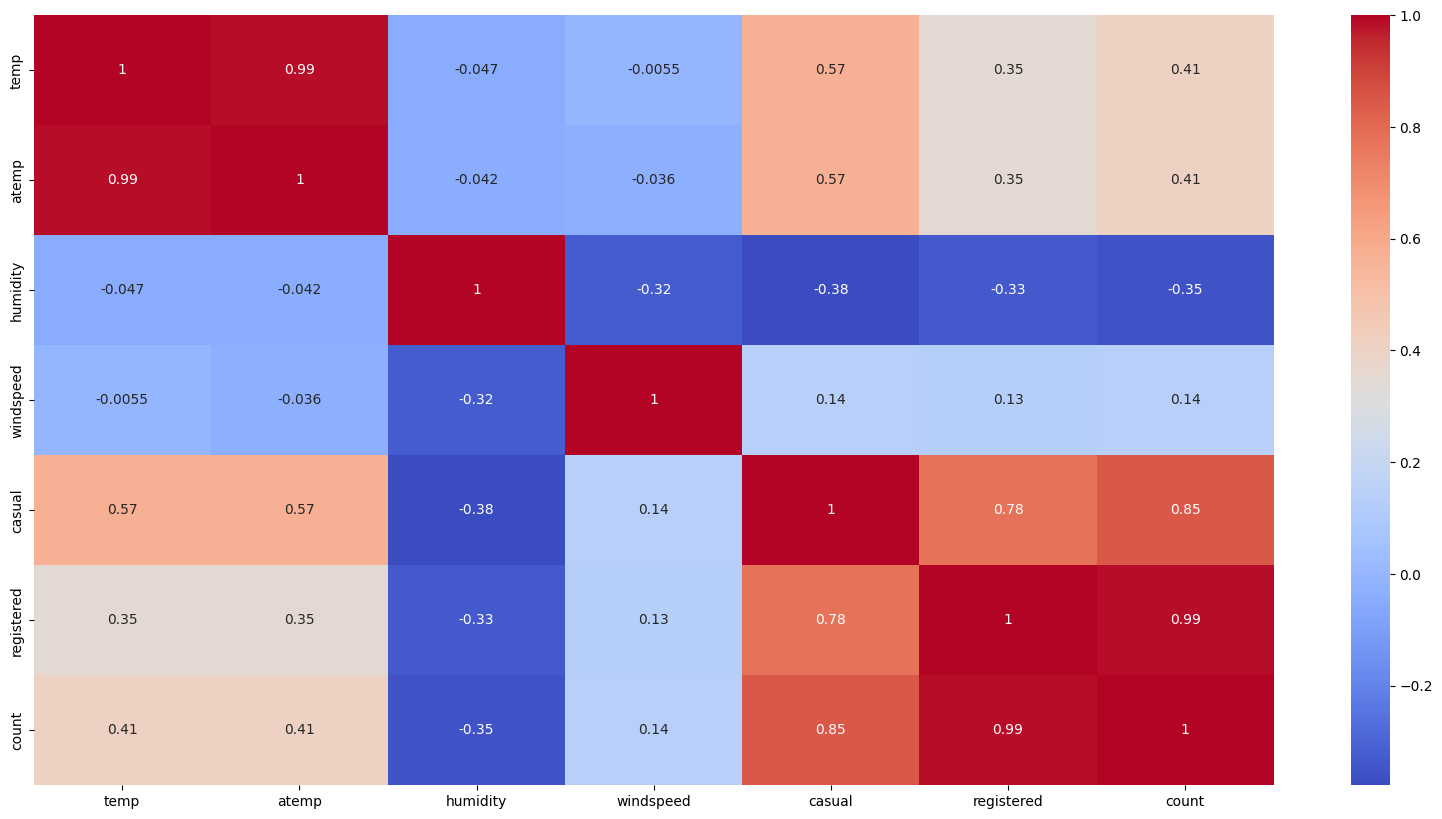

In [39]:
#We want to see if temp and atemp are correlated.
#If they are highly correlated, we can drop one of them.
#We can use Pearson correlation to find this out.
correlation_matrix = df[['temp','atemp','humidity','windspeed','casual','registered','count']].corr(method="spearman")
#increase the size of the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')




In [40]:
#print if the two columns are correlated or not by accessing the correlation dataframe

# Function to check correlation between two columns
def collect_correlation_results(corr_matrix, threshold=0.5):
    correlated = []
    not_correlated = []
    
    # Loop through all column pairs
    columns = corr_matrix.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):  # Avoid duplicate pairs and self-correlation
            col1 = columns[i]
            col2 = columns[j]
            correlation_value = corr_matrix.loc[col1, col2]
            
            # Collect results
            if abs(correlation_value) > threshold:
                correlated.append((col1, col2, correlation_value))
            else:
                not_correlated.append((col1, col2, correlation_value))
    
    return correlated, not_correlated

# Call the function
correlated, not_correlated = collect_correlation_results(correlation_matrix)

# Print the results
print("Correlated Columns:")
for col_pair in correlated:
    print(f"Using correlation, we established {col_pair[0]} and {col_pair[1]} are correlated. Correlation: {col_pair[2]:.2f}")

print("\nNot Correlated Columns:")
for col_pair in not_correlated:
    print(f"Using correlation, we established {col_pair[0]} and {col_pair[1]} are not correlated. Correlation: {col_pair[2]:.2f}")

Correlated Columns:
Using correlation, we established temp and atemp are correlated. Correlation: 0.99
Using correlation, we established temp and casual are correlated. Correlation: 0.57
Using correlation, we established atemp and casual are correlated. Correlation: 0.57
Using correlation, we established casual and registered are correlated. Correlation: 0.78
Using correlation, we established casual and count are correlated. Correlation: 0.85
Using correlation, we established registered and count are correlated. Correlation: 0.99

Not Correlated Columns:
Using correlation, we established temp and humidity are not correlated. Correlation: -0.05
Using correlation, we established temp and windspeed are not correlated. Correlation: -0.01
Using correlation, we established temp and registered are not correlated. Correlation: 0.35
Using correlation, we established temp and count are not correlated. Correlation: 0.41
Using correlation, we established atemp and humidity are not correlated. Corr

In [41]:
#Null Hypothesis= temp and atemp are independent, Alternate Hypothesis= temp and atemp are dependent

#Before we can apply T test, we need to check if the two samples have equal variance
#Levene test for variance

#Null Hypothesis= 
Ho="temp and atemp have equal variance"
#Alternate Hypothesis
Ha = "temp and atemp do not have equal variance"

levene_stat, p_value = stats.levene(df.temp, df.atemp)
print(f'levene p value={p_value}')
if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")



levene p value=1.3036286748857844e-16
Reject Null Hypothesis. Alternate Hypothesis 'temp and atemp do not have equal variance' is True


In [42]:
#As the variance is not equal, we will use Welch's T test

#Null Hypothesis= 
Ho="temp and atemp are not dependent"
#Alternate Hypothesis
Ha = "temp and atemp are dependent"


t_score,p_value=stats.ttest_ind(df.temp, df.atemp, equal_var=False)
print("t_score: ", t_score)
print("p_value: ", p_value)


if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")

t_score:  -31.034373668868025
p_value:  6.346301822312551e-207
Reject Null Hypothesis. Alternate Hypothesis 'temp and atemp are dependent' is True


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>datetime,season,holiday,workingday,weather are categorical columns that are encoded here.  We can ignore their values.
<li> We can see from the correlation heatmap that temp and atemp are highly positively correlated. Same was confirmed using Welch's T-test 
<li>Null Hypothesis= temp and atemp are independent, Alternate Hypothesis= temp and atemp are dependent
<li> We can see from the correlation heatmap that registered and count are highly positively correlated

<li>We can focus on temp and count columns and can ignore atemp and registered columns, ofcourse for specific analysis, these columns can still be used

# 3.2.3 
<span style="font-size:30px; font-family:Arial;color:orange">Use ANOVA/Kruksal Test for checking if categorical column(month,day_of_week,hour,season,weather,workingday) and numerical column(temp) are dependent</span>


In [43]:
#We want to know if temp column is dependent on season column
#Null Hypothesis= temp and season are independent, Alternate Hypothesis= temp and season are dependent
#We will use ANOVA test to find this out

#For anova, we need to see if assumptions hold
#1. Normality
#2. Homogeneity of variance
#3. Independent observations

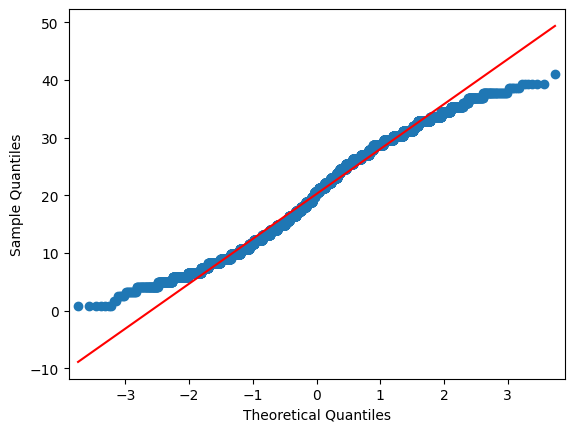

In [44]:
#Lets do visual test QQ PLot for normality
from statsmodels.graphics.gofplots import qqplot
qqplot(df.temp, line="s")
plt.show()

In [45]:
#From qq plot, data does not seem to be normal.
#We can also use shapiro test to confirm this

#Null Hypothesis= 
Ho="temp is normally distributed"
#Alternate Hypothesis
Ha = "temp is not normally distributed"


test_stat, p_value = stats.shapiro(df.temp)
print("Shapiro p_value: ", p_value)


if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")






Shapiro p_value:  4.441692164461084e-36
Reject Null Hypothesis. Alternate Hypothesis 'temp is not normally distributed' is True


C:\tools\Manim\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>temp is not normally distributed, so we cannot use ANOVA for this test.  We will have to use KRUSKAL WALLIS test

In [46]:
#print the different seasons
df.season.unique()

#create a dataframe that has temp column where season is 1
df_season1 = df.query('season==1').temp
df_season2 = df.query('season==2').temp
df_season3 = df.query('season==3').temp
df_season4 = df.query('season==4').temp




In [47]:
#Null Hypothesis= 
Ho="temp and season are not dependent. Medians of groups of temp based on season are same"
#Alternate Hypothesis
Ha = "temp and season are dependent. Medians of groups of temp based on season are different"


kruskal_result = stats.kruskal(df_season1,df_season2,df_season3,df_season4)
p_value = kruskal_result.pvalue
print("Kruskal p_value: ", p_value)


if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")


Kruskal p_value:  0.0
Reject Null Hypothesis. Alternate Hypothesis 'temp and season are dependent. Medians of groups of temp based on season are different' is True


In [48]:
#for doing anova or Kruskal wallis, we need to find each unique value of the categorical column 
# and then create dataframes that have values from numerical column for each unique categorical column value...
# it seems too much work...is there some shortcut or code I can reuse

#Reusable function
#It will perform Anova or Kruksal based on input
#It will generate all groups and then perform the specific test.

def perform_anova_kruskal(data,numerical_column,categorical_column, test, log="detailed"):
    # Group data by category and extract numerical values
    groups = [group[numerical_column].values for _, group in data.groupby(categorical_column)]

    if(test=='kruskal'):
        #Null Hypothesis= 
        Ho=f"{categorical_column} does not have a statistically significant impact on {numerical_column}. They are independent."
        HoDetail=f" Medians of groups of {numerical_column} based on {categorical_column} are same"
        #Alternate Hypothesis
        Ha=f"{categorical_column} has a statistically significant impact on {numerical_column}. They are DEPENDENT."
        HaDetail=f" Medians of groups of {numerical_column} based on {categorical_column} are different"

        # Perform Kruskal-Wallis Test
        kruskal_result = stats.kruskal(*groups)
        p_value= kruskal_result.pvalue

        if(log=="detailed"):
            print(f'Ho = {Ho}')
            print(f'Ha = {Ha}')
            print("Kruskal-Wallis Result:", kruskal_result)


    if(test=='anova'):
        #Null Hypothesis= 
        Ho=f"{categorical_column} does not have a statistically significant impact on {numerical_column}. They are independent."
        HoDetail=f" Mean of groups of {numerical_column} based on {categorical_column} are same"
        #Alternate Hypothesis
        Ha=f"{categorical_column} has a statistically significant impact on {numerical_column}. They are DEPENDENT."
        HaDetail=f" Mean of groups of {numerical_column} based on {categorical_column} are different"

        # Perform Anova Test
        anova_result = stats.f_oneway(*groups)
        p_value= anova_result.pvalue
        if(log=="detailed"):
            print(f'Ho = {Ho}')
            print(f'Ha = {Ha}')
            print("ANOVA Result:", anova_result)        


    if(p_value<0.05):
        if(log=="detailed"):
            print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}{HaDetail}' is True, p-value:{p_value}")
        else:
            print(f'{Ha}, p-value:{p_value}')
    else:
        if(log=="detailed"):
            print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}{HoDetail}' is True, p-value:{p_value}")
        else:
              print(f'{Ho}, p-value:{p_value}')
    if(log=="detailed"):
        print()

In [49]:
numerical_column='temp'
test= 'kruskal'
categorical_columns = ["month","day_of_week","hour","season","weather","workingday"]

for cat_column in categorical_columns:
    perform_anova_kruskal(df,numerical_column=numerical_column, categorical_column=cat_column, test=test,log="detailed")

for cat_column in categorical_columns:
    perform_anova_kruskal(df,numerical_column=numerical_column, categorical_column=cat_column, test=test,log="compact")






Ho = month does not have a statistically significant impact on temp. They are independent.
Ha = month has a statistically significant impact on temp. They are DEPENDENT.
Kruskal-Wallis Result: KruskalResult(statistic=8343.624307575239, pvalue=0.0)
Reject Null Hypothesis. Alternate Hypothesis 'month has a statistically significant impact on temp. They are DEPENDENT. Medians of groups of temp based on month are different' is True, p-value:0.0

Ho = day_of_week does not have a statistically significant impact on temp. They are independent.
Ha = day_of_week has a statistically significant impact on temp. They are DEPENDENT.
Kruskal-Wallis Result: KruskalResult(statistic=23.53908652561465, pvalue=0.0006346412367501534)
Reject Null Hypothesis. Alternate Hypothesis 'day_of_week has a statistically significant impact on temp. They are DEPENDENT. Medians of groups of temp based on day_of_week are different' is True, p-value:0.0006346412367501534

Ho = hour does not have a statistically signific

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>month and temp are dependent
<li>season and temp are dependent.
<li>weather and temp are dependent.


# 3.2.4 
<span style="font-size:30px; font-family:Arial;color:orange">Use ANOVA/Kruksal Test for checking if categorical column(month,day_of_week,hour,season,weather,workingday) and numerical column(count) are dependent</span>

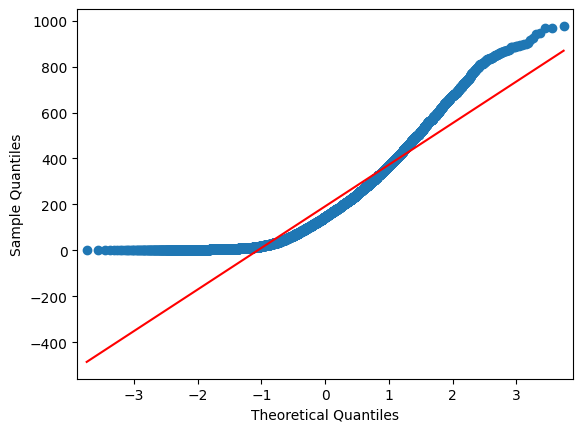

Shapiro p_value:  5.3698378931152006e-68
Reject Null Hypothesis. Alternate Hypothesis 'count is not normally distributed' is True


C:\tools\Manim\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
#We want to know if count column is dependent on season, month, weather, workingday columns

#We will use ANOVA test to find this out
#For anova, we need to see if assumptions hold
#1. Normality
#2. Homogeneity of variance
#3. Independent observations

numerical_column="count"



#Lets do visual test QQ PLot for normality
from statsmodels.graphics.gofplots import qqplot
qqplot(df[numerical_column], line="s")
plt.show()


#From qq plot, data does not seem to be normal.
#We can also use shapiro test to confirm this

#Null Hypothesis= 
Ho=f"{numerical_column} is normally distributed"
#Alternate Hypothesis
Ha = f"{numerical_column} is not normally distributed"


test_stat, p_value = stats.shapiro(df[numerical_column])
print("Shapiro p_value: ", p_value)


if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")

In [51]:
#As count is not normally distributed, we will have to use Kruskal test

numerical_column='count'
test= 'kruskal'
categorical_columns = ["month","day_of_week","hour","season","weather","workingday"]
for cat_column in categorical_columns:
    perform_anova_kruskal(df,numerical_column=numerical_column, categorical_column=cat_column, test=test,log="compact")



month has a statistically significant impact on count. They are DEPENDENT., p-value:5.534901654936772e-170
day_of_week has a statistically significant impact on count. They are DEPENDENT., p-value:0.005509463320287259
hour has a statistically significant impact on count. They are DEPENDENT., p-value:0.0
season has a statistically significant impact on count. They are DEPENDENT., p-value:2.479008372608633e-151
weather has a statistically significant impact on count. They are DEPENDENT., p-value:3.501611300708679e-44
workingday does not have a statistically significant impact on count. They are independent., p-value:0.9679113872727798


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>month and count are dependent
<li>day_of_week and count are dependent
<li>hour and count are dependent.
<li>season and count are dependent.
<li>weather and count are dependent.
<li>workingday and count are independent.

# 3.2.4 
<span style="font-size:30px; font-family:Arial;color:orange">Use ANOVA/Kruksal Test for checking if categorical column(month,day_of_week,hour,season,weather,workingday) and numerical column(humidity) are dependent</span>

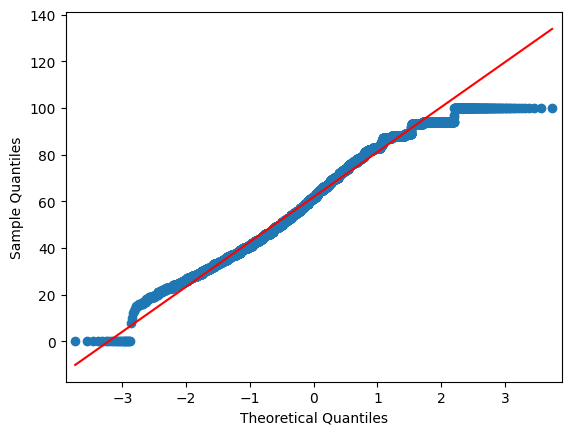

Shapiro p_value:  1.222028915510694e-34
Reject Null Hypothesis. Alternate Hypothesis 'humidity is not normally distributed' is True


In [52]:
#We want to know if count column is dependent on season, month, weather, workingday columns

#We will use ANOVA test to find this out
#For anova, we need to see if assumptions hold
#1. Normality
#2. Homogeneity of variance
#3. Independent observations

numerical_column='humidity'



#Lets do visual test QQ PLot for normality
qqplot(df[numerical_column], line="s")
plt.show()


#From qq plot, data does not seem to be normal.
#We can also use shapiro test to confirm this

#Null Hypothesis= 
Ho=f"{numerical_column} is normally distributed"
#Alternate Hypothesis
Ha = f"{numerical_column} is not normally distributed"


test_stat, p_value = stats.shapiro(df[numerical_column])
print("Shapiro p_value: ", p_value)


if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")

In [53]:

test= 'kruskal'
categorical_columns = ["month","day_of_week","hour","season","weather","workingday"]
for cat_column in categorical_columns:
    perform_anova_kruskal(df,numerical_column=numerical_column, categorical_column=cat_column, test=test,log="compact")

month has a statistically significant impact on humidity. They are DEPENDENT., p-value:6.889102158338373e-191
day_of_week has a statistically significant impact on humidity. They are DEPENDENT., p-value:5.4207615669290894e-20
hour has a statistically significant impact on humidity. They are DEPENDENT., p-value:0.0
season has a statistically significant impact on humidity. They are DEPENDENT., p-value:3.1001329864330053e-86
weather has a statistically significant impact on humidity. They are DEPENDENT., p-value:0.0
workingday does not have a statistically significant impact on humidity. They are independent., p-value:0.29450053239242346


# 4.0 
<span style="font-size:50px; font-family:Arial;color:red">Answering Questions asked in Case Study

# 4.1
<span style="font-size:30px; font-family:Arial;color:orange">2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented</span>


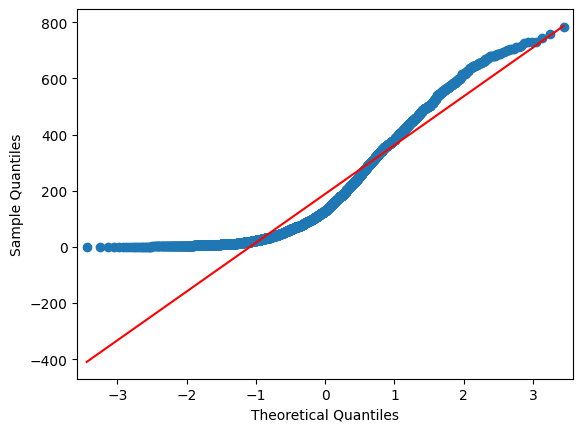

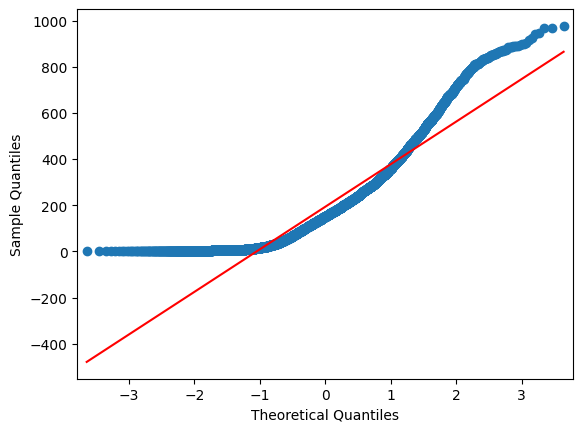

In [54]:
#We already established this using Kruskal test earlier that working day does not have impact on number of electric cycles.  Two-Sample T test can be used to further confirm 
# Requirement for 2 Sample T test is that data needs to be normal.  We already established that count is not normally distributed.
# So technically 2 Sample T test is not applicable.

#Still lets verify normality one more time
groups = [group['count'].values for _, group in df.groupby('workingday')]

#Check normality
#Lets do visual test QQ PLot for normality
#plot both graphs on single plot
qqplot(groups[0], line="s")
plt.show()
qqplot(groups[1], line="s")
plt.show()


In [55]:
#So we again find that the data is not normal, which violates condition for T Test.
#Lets check if variances are same or not

#Levene test for variance
levene_stat, p_value = stats.levene(groups[0],groups[1])
print(f'levene p value={p_value}')


levene p value=0.9437823280916695


Variances are same.

In [56]:
#Null Hypothesis= 
Ho="workingday and count are not dependent"
#Alternate Hypothesis
Ha = "workingday and count are dependent"


t_score,p_value=stats.ttest_ind(groups[0],groups[1], equal_var=True)
print("t_score: ", t_score)
print("p_value: ", p_value)


if(p_value<0.05):
    print(f"Reject Null Hypothesis. Alternate Hypothesis '{Ha}' is True")
else:
    print(f"Fail to Reject Null Hypothesis. Null Hypothesis '{Ho}' is True")

t_score:  -1.2096277376026694
p_value:  0.22644804226361348
Fail to Reject Null Hypothesis. Null Hypothesis 'workingday and count are not dependent' is True


<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>So now we have reconfirmed that workingday and count (of rented vehicles) is independent of each other, as we got a p-value:0.22 using Two-Sample T test and p-value:0.9679 using Kruksal Test. As noted though, Two Sample T test requires data to be normal but the given data is not normally distributed, hence Kruksal test is better test here.

# 4.2
<span style="font-size:30px; font-family:Arial;color:orange">ANOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season </span>

As count is not normally distributed, we performed Kruksal Test for this in 
- [3.2.4 Use ANOVA/Kruksal Test for checking if categorical column(month,day_of_week,hour,season,weather,workingday) and numerical column(count) are dependent](#3.2.4)

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Using Kruskal test, we established: weather and count are dependent. p-value:3.501611300708679e-44
<li>Using Kruskal test, we established: season and count are dependent.  p-value:2.479008372608633e-151

# 4.3
<span style="font-size:30px; font-family:Arial;color:orange">Chi-square test to check if Weather is dependent on the season</span>

<span style="font-size:25px; font-family:Arial;color:#3c33ff; background-color:white;">
<li>Using ChiSquiare test, we establish that Season and weather are highly dependent
<li>p-value = 1.549925073686492e-07

# 5.0
<span style="font-size:50px; font-family:Arial;color:red">Business Insights

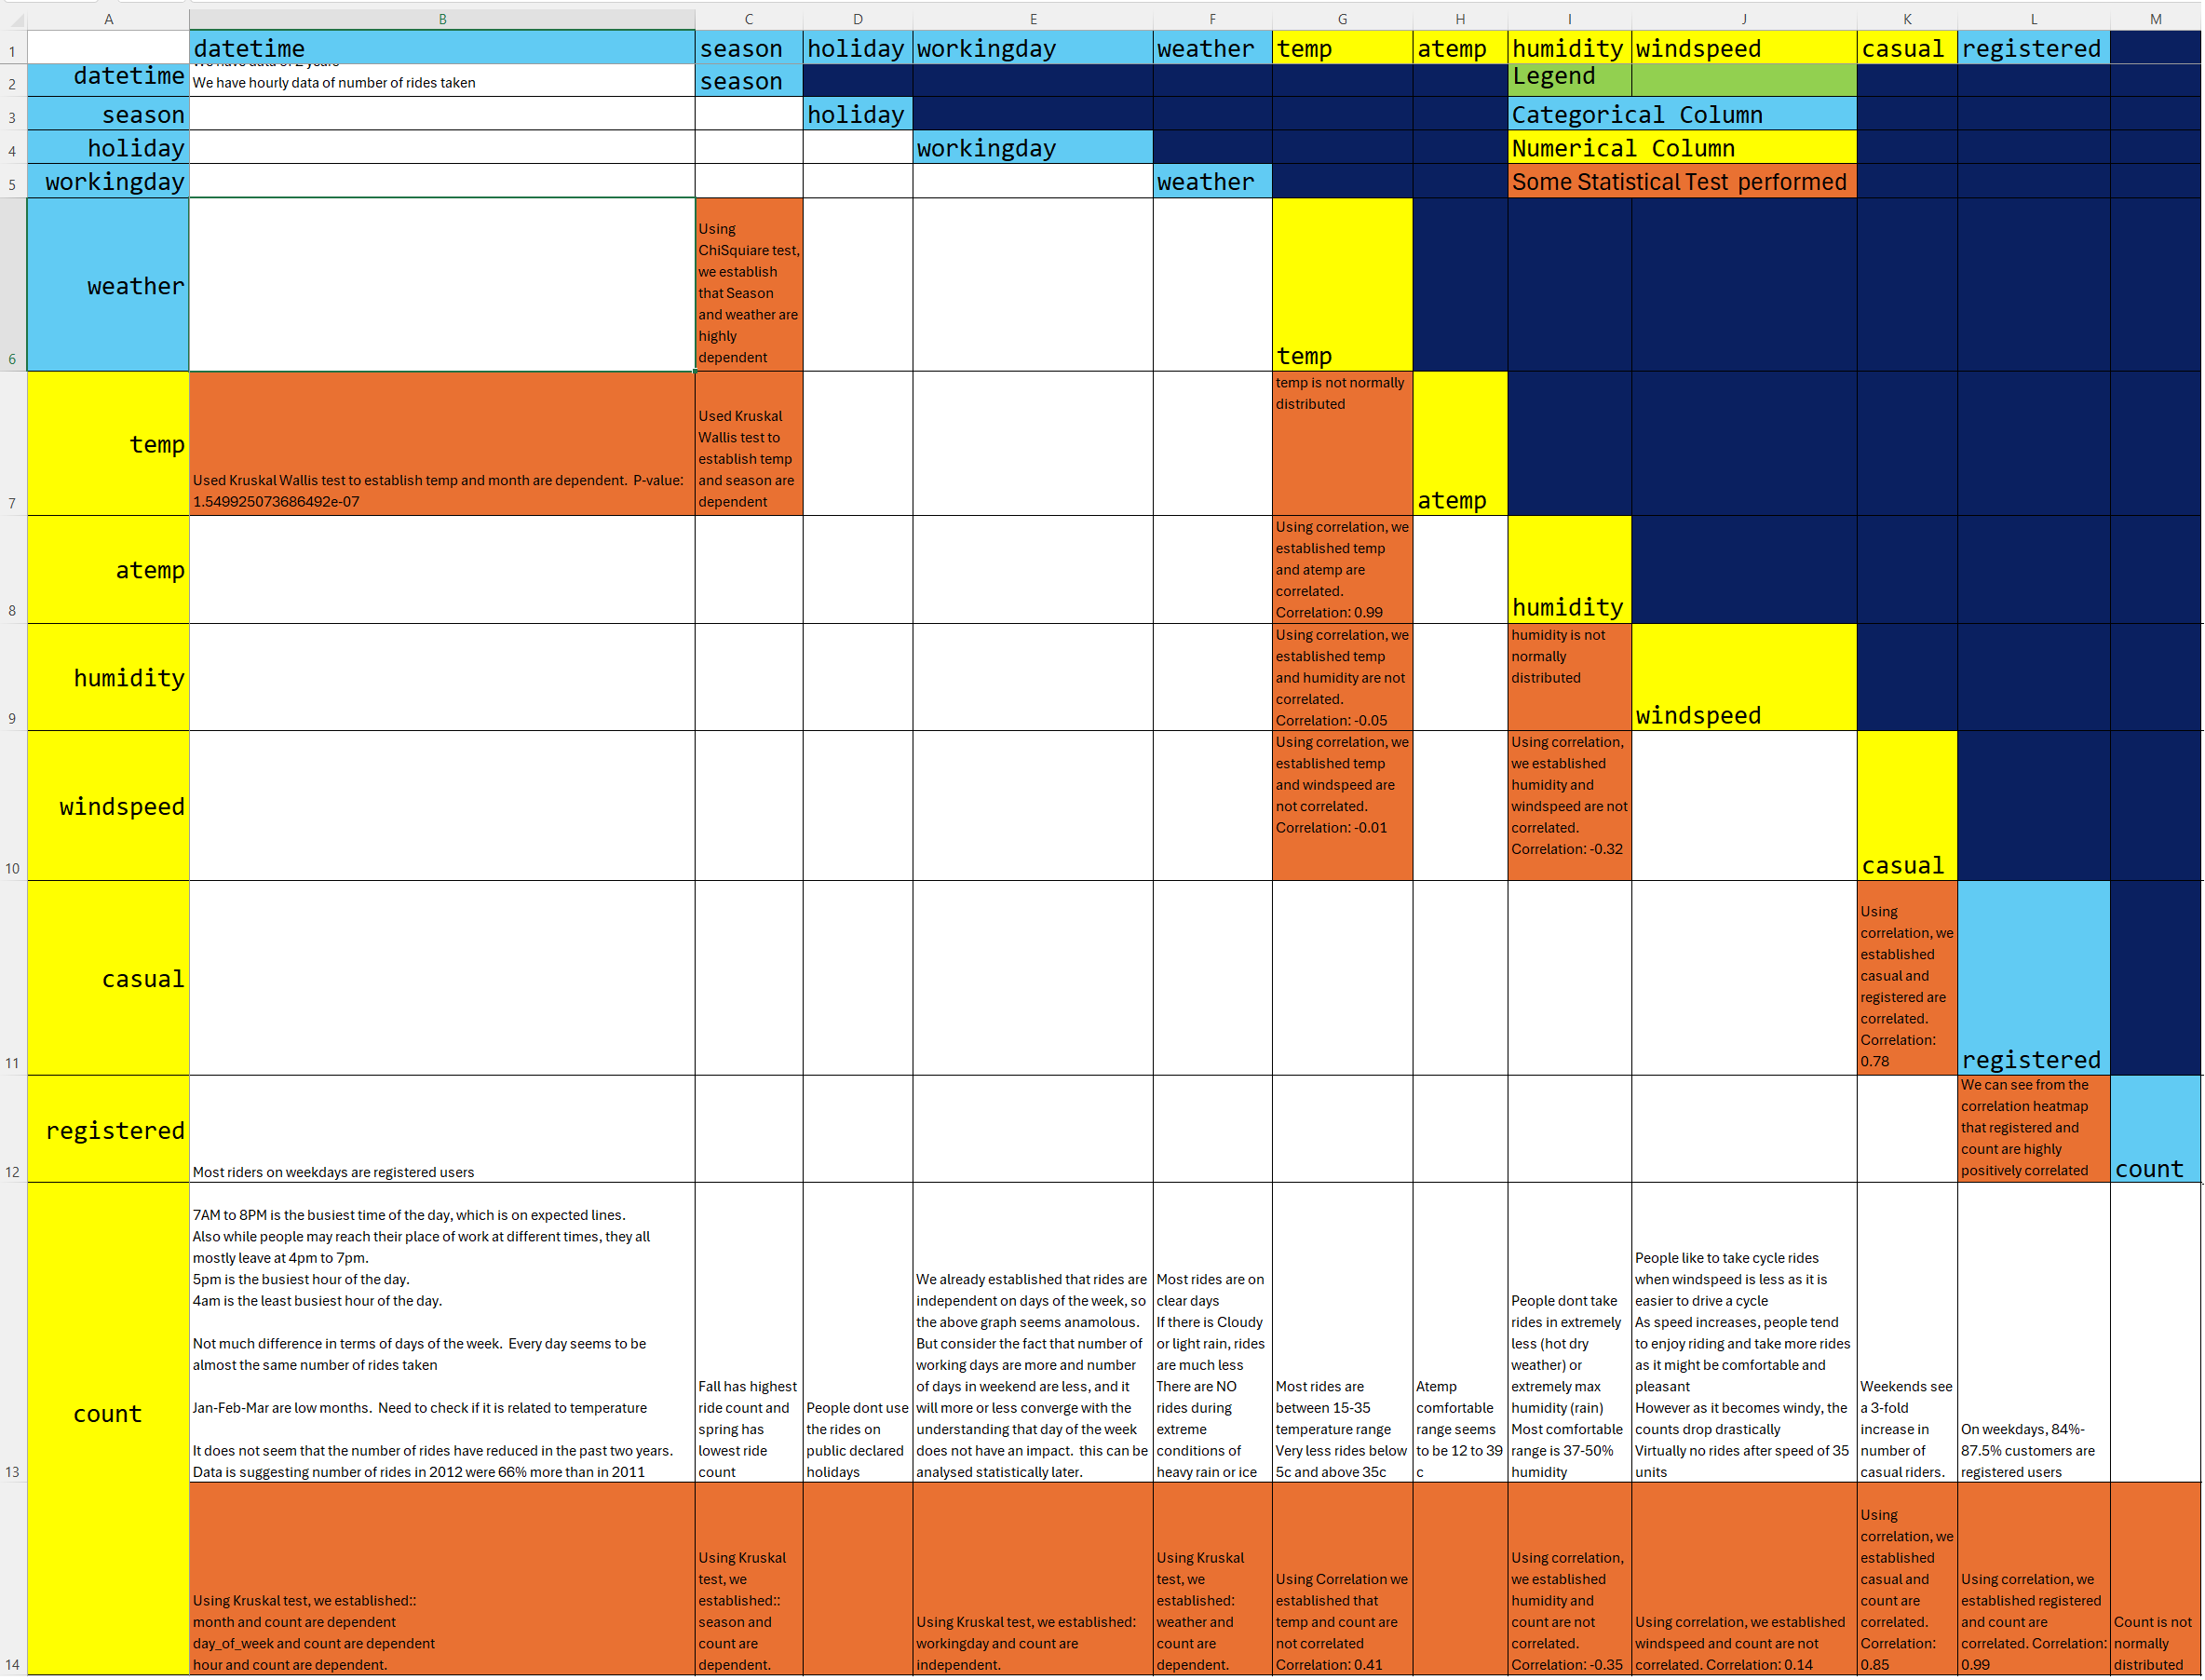

<li>We have data of 2 years
<li>We have hourly data of number of rides taken
<li>Used Kruskal Wallis test to establish temp and month are dependent.  P-value: 1.549925073686492e-07
<li>Most riders on weekdays are registered users
<li>7AM to 8PM is the busiest time of the day, which is on expected lines.  
<li>Also while people may reach their place of work at different times, they all mostly leave at 4pm to 7pm.
<li>5pm is the busiest hour of the day.
<li>4am is the least busiest hour of the day.
<li>Not much difference in terms of days of the week.  Every day seems to be almost the same number of rides taken
<li>Jan-Feb-Mar are low months.  Need to check if it is related to temperature
<li>It does not seem that the number of rides have reduced in the past two years.  Data is suggesting number of rides in 2012 were 66% more than in 2011
<li>Using Kruskal test, we established:
<li>* month and count are dependent
<li>* day_of_week and count are dependent
<li>* hour and count are dependent.
<li>Using ChiSquare test, we establish that Season and weather are highly dependent
<li>Used Kruskal Wallis test to establish temp and season are dependent
<li>Fall has highest ride count and spring has lowest ride count
<li>Using Kruskal test, we established:season and count are dependent.
<li>People dont use the rides on public declared holidays
<li>Using Kruskal test, we established:workingday and count are independent.
<li>Most rides are on clear days
<li>If there is Cloudy or light rain, rides are much less
<li>There are NO rides during extreme conditions of heavy rain or ice
<li>Using Kruskal test, we established:weather and count are dependent.
<li>temp is not normally distributed
<li>Using correlation, we established temp and atemp are correlated. Correlation: 0.99
<li>Using correlation, we established temp and humidity are not correlated. Correlation: -0.05
<li>Using correlation, we established temp and windspeed are not correlated. Correlation: -0.01
<li>Most rides are between 15-35 temperature range
<li>Very less rides below 5c and above 35c
<li>Using Correlation we established that temp and count are not correlated Correlation: 0.41
<li>Atemp comfortable range seems to be 12 to 39 c
<li>Humidity is not normally distributed
<li>Using correlation, we established humidity and windspeed are not correlated. Correlation: -0.32
<li>People dont take rides in extremely less (hot dry weather) or extremely max humidity (rain)
<li>Most comfortable range is 37-50% humidity
<li>Using correlation, we established humidity and count are not correlated. Correlation: -0.35
<li>People like to take cycle rides when windspeed is less as it is easier to drive a cycle
<li>* As speed increases, people tend to enjoy riding and take more rides as it might be comfortable and pleasant
<li>* However as it becomes windy, the counts drop drastically
<li>* Virtually no rides after speed of 35 units
<li>Using correlation, we established windspeed and count are not correlated. Correlation: 0.14
<li>Weekends see a 3-fold increase in number of casual riders.  
<li>Using correlation, we established casual and count are correlated. Correlation: 0.85
<li>Using correlation, we established registered and count are correlated. Correlation: 0.99
<li>On weekdays, 84%-87.5% customers are registered users

# 6.0
<span style="font-size:50px; font-family:Arial;color:red">Inferences

# Causal Relation between different parameters




In [57]:
#drop temp_bin column
df.drop(columns=['temp_bin','atemp_bin','humidity_bin','windspeed_bin'], inplace=True)


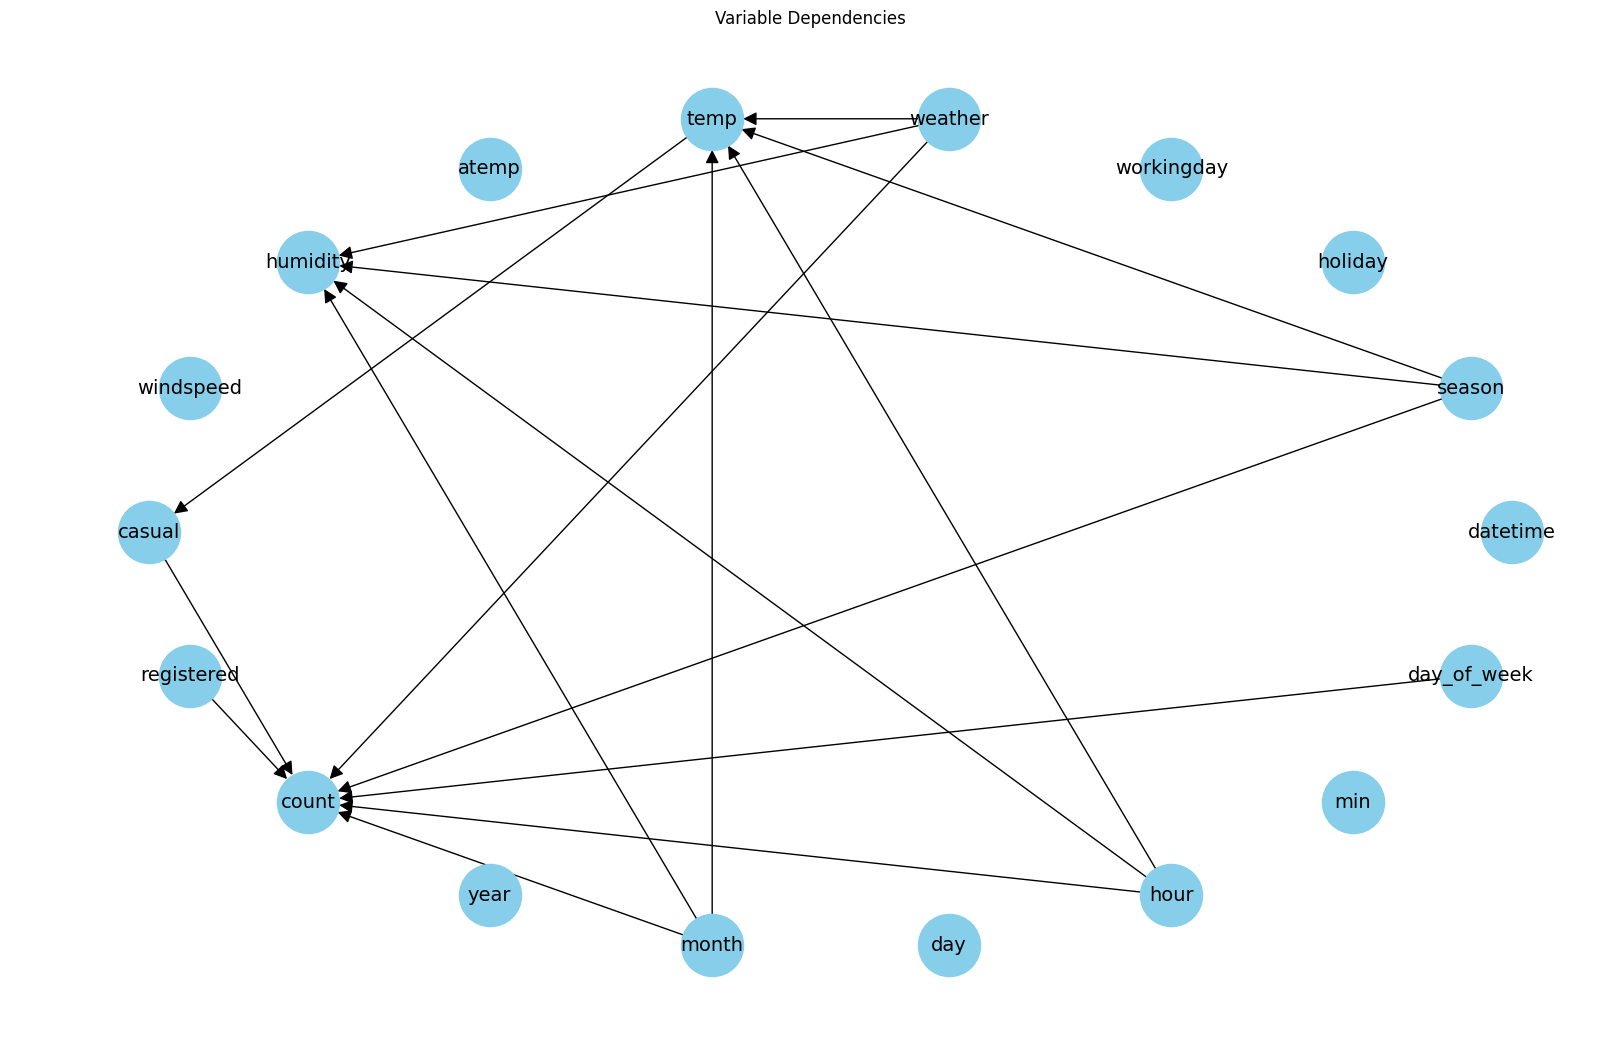

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (variables)
variables = df.columns
G.add_nodes_from(variables)

# # Add edges (dependencies between variables)
# # Format: G.add_edge(from_node, to_node)
 
G.add_edge( 'month','temp') 
G.add_edge( 'weather','temp') 
G.add_edge( 'hour','temp') 
G.add_edge( 'season','temp') 
G.add_edge('temp','casual' )  #temp impacts casual

G.add_edge('casual','count' )  
G.add_edge( 'registered','count') 
G.add_edge( 'hour','count' ) 
G.add_edge( 'day_of_week','count' ) 
G.add_edge( 'month','count' ) 
G.add_edge( 'season','count') 
G.add_edge( 'weather','count') 

G.add_edge( 'month','humidity' ) 
#G.add_edge( 'day_of_week','humidity' ) #does not make sense practically
G.add_edge( 'hour','humidity' )  
G.add_edge( 'season','humidity' ) 
G.add_edge( 'weather','humidity' ) 



# Draw the graph
plt.figure(figsize=(16, 10))
#pos = nx.spring_layout(G)  # Layout for better positioning
pos = nx.circular_layout(G)
#pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, arrowstyle='-|>', arrowsize=20)
plt.title("Variable Dependencies")
plt.show()

# Factors affecting the demand for shared electric cycles in the Indian market

<li>Count is dependent on 
<ul>
    <li>hour 
    <li>day_of_week 
    <li>month 
    <li>season
    <li>weather
    <li>casual
    <li>registered
</ul>
<li>In India, if there was flood or heat wave situation in past 2 yrs, it would have affected ride count. 
<br/><br/><br/><br/><br/>
FURTHER POINTERS FOR DATA THAT CAN BE COLLECTED FOR ANALYSIS
<br/><br/>
There could be plethora of other factors that may be affecting adoption of bikes in India
Yulu needs to collect data on some or all of these to better understand the indian market
<li> Safety- Indian roads are poorly designed from cyclists point of view.  There are usually no separate lanes
<ul>
    <li>Evaluate accident rates or reported incidents involving cyclists.
    <li>Survey cyclists about perceived safety concerns on Indian roads.
</ul>    
<br/>
<br/>
<li> Poor driving sense of vehicle drivers 
<ul><li>Collect data on the driving habits of motorists and their interactions with cyclists
<li>Identify customer pain points regarding access to charging facilities.
</ul>    
<br/><br/>
<li> Lack of charging stations
<ul><li> Map the availability of e-bike charging stations and their proximity to Yulu bike zones.
</ul>    
<br/><br/> 
<li> Lack of Mobile penetration
<ul> Analyze the penetration of mobile devices in areas Yulu operates.
</ul>    
<br/><br/><li> Ease of use of Yulu app for Indian customer
<ul><li> Test the user-friendliness of the Yulu app for a diverse demographic with varying levels of digital literacy
</ul>    
<br/><br/><li> Accessibility of bike zones to potential customer
<ul><li> Map the proximity and density of Yulu bike zones relative to potential customer locations.
<li>Conduct surveys to gauge whether customers find these zones convenient and easy to locate
</ul>    
<br/><br/><li> Affordability versus health benefit for the middle class who may prefer to use a cheaper mode of travel
<ul><li>Compare the cost of Yulu bikes versus other transport options like buses or shared autos.
<li>Explore the perceived value of cycling as a healthier travel mode among different income groups
</ul>    
<br/><br/><li> Damage to bike by rider
<ul><li> Track instances of bike damage by users and understand the reasons behind them.
<li>Analyze repair and maintenance costs to see if they impact operational efficiency
</ul>    
<br/><br/><li> Societal perception of somebody riding a cycle
<ul><li> Conduct qualitative interviews or focus groups to understand societal attitudes toward cycling.
<li>Identify potential stigmas or barriers that discourage people from using bikes
</ul>    

